In [2]:
#import or_gym
#from or_gym.utils import create_env
import ray
from ray.rllib import agents
from ray import tune
import tensorflow

### To view the tensorboard: 
    1: tensorboard --logdir ray_results 
    2: see http://localhost:6006/ in browser

In [3]:
import ray
info = ray.init(ignore_reinit_error=True, log_to_driver=False)

2021-10-15 10:46:36,156	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


In [4]:
print("Dashboard URL: http://{}".format(info["webui_url"]))

Dashboard URL: http://127.0.0.1:8265


In [9]:
from ray.rllib.agents.ppo import PPOTrainer ,DEFAULT_CONFIG

config = DEFAULT_CONFIG.copy()
config['num_workers'] = 1
config['num_sgd_iter'] = 30
config['sgd_minibatch_size'] = 128
config['model']['fcnet_hiddens'] = [100, 100]
config['num_cpus_per_worker'] = 0

In [10]:
agent = PPOTrainer(config, 'CartPole-v1')

2021-10-15 10:49:33,568	INFO trainer.py:714 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-10-15 10:49:33,570	INFO ppo.py:158 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2021-10-15 10:49:33,570	INFO trainer.py:726 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-10-15 10:49:38,869	WARNING util.py:55 -- Install gputil for GPU system monitoring.


In [6]:
N = 10
results = []
episode_data = []
episode_json = []

for n in range(N):
    result = agent.train()
    results.append(result)
    
    episode = {'n': n, 
               'episode_reward_min':  result['episode_reward_min'],  
               'episode_reward_mean': result['episode_reward_mean'], 
               'episode_reward_max':  result['episode_reward_max'],  
               'episode_len_mean':    result['episode_len_mean']} 
    
    episode_data.append(episode)
    episode_json.append(json.dumps(episode))
    
    print(f'{n:3d}: Min/Mean/Max reward: {result["episode_reward_min"]:8.4f}/{result["episode_reward_mean"]:8.4f}/{result["episode_reward_max"]:8.4f}')

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
  0: Min/Mean/Max reward:   9.0000/ 22.2737/ 76.0000
  1: Min/Mean/Max reward:   9.0000/ 39.8200/135.0000
  2: Min/Mean/Max reward:   9.0000/ 57.3400/196.0000
  3: Min/Mean/Max reward:   9.0000/ 88.1600/460.0000
  4: Min/Mean/Max reward:  13.0000/121.4900/460.0000
  5: Min/Mean/Max reward:  13.0000/148.7200/460.0000
  6: Min/Mean/Max reward:  13.0000/184.6900/500.0000
  7: Min/Mean/Max reward:  15.0000/211.1200/500.0000
  8: Min/Mean/Max reward:  19.0000/244.8100/500.0000
  9: Min/Mean/Max reward:  19.0000/281.7500/500.0000


In [7]:
df = pd.DataFrame(data=episode_data)
df

,n,episode_reward_min,episode_reward_mean,episode_reward_max,episode_len_mean
0,0,9.0,22.273743,76.0,22.273743
1,1,9.0,39.820000,135.0,39.820000
2,2,9.0,57.340000,196.0,57.340000
3,3,9.0,88.160000,460.0,88.160000
4,4,13.0,121.490000,460.0,121.490000
5,5,13.0,148.720000,460.0,148.720000
6,6,13.0,184.690000,500.0,184.690000
7,7,15.0,211.120000,500.0,211.120000
8,8,19.0,244.810000,500.0,244.810000
9,9,19.0,281.750000,500.0,281.750000


In [8]:
df.columns.tolist()

['n',
 'episode_reward_min',
 'episode_reward_mean',
 'episode_reward_max',
 'episode_len_mean']

<AxesSubplot:label='f2a23b20-5561-402a-a2eb-1939725b3bab'>

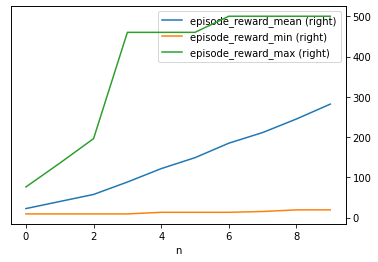

In [9]:
df.plot(x="n", y=["episode_reward_mean", "episode_reward_min", "episode_reward_max"], secondary_y=True)

In [10]:
print(pretty_print(results[-1]))

custom_metrics: {}
date: 2020-12-31_16-37-16
done: false
episode_len_mean: 281.75
episode_reward_max: 500.0
episode_reward_mean: 281.75
episode_reward_min: 19.0
episodes_this_iter: 9
episodes_total: 431
experiment_id: 38573bbc0d984276b0cf9bc2d5adf536
hostname: Mingjuns-MacBook-Pro.local
info:
  learner:
    default_policy:
      cur_kl_coeff: 0.07500000298023224
      cur_lr: 4.999999873689376e-05
      entropy: 0.48461440205574036
      entropy_coeff: 0.0
      kl: 0.0026141125708818436
      model: {}
      policy_loss: -0.0014844546094536781
      total_loss: 636.03125
      vf_explained_var: 0.08142014592885971
      vf_loss: 636.0325927734375
  num_steps_sampled: 40000
  num_steps_trained: 40000
iterations_since_restore: 10
node_ip: 192.168.0.41
num_healthy_workers: 1
off_policy_estimator: {}
perf:
  cpu_util_percent: 27.879999999999995
  ram_util_percent: 66.47999999999999
pid: 19598
policy_reward_max: {}
policy_reward_mean: {}
policy_reward_min: {}
sampler_perf:
  mean_action_pr

<AxesSubplot:xlabel='episode'>

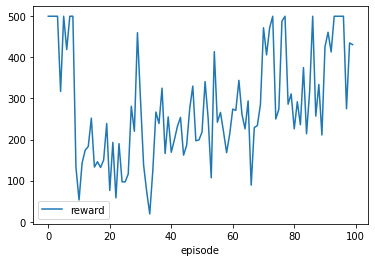

In [11]:
episode_rewards = results[-1]['hist_stats']['episode_reward']
df_episode_rewards = pd.DataFrame(data={'episode':range(len(episode_rewards)), 'reward':episode_rewards})

df_episode_rewards.plot(x="episode", y="reward")

In [12]:
checkpoint_path = agent.save()
print(checkpoint_path)

/Users/mingjunwang/ray_results/PPO_CartPole-v1_2020-12-31_16-36-29x31u9cjm/checkpoint_10/checkpoint-10


In [13]:
trained_config = config.copy()
test_agent = PPOTrainer(trained_config, "CartPole-v1")
test_agent.restore(checkpoint_path)

2020-12-31 16:38:03,607	WARNING util.py:43 -- Install gputil for GPU system monitoring.
2020-12-31 16:38:03,709	INFO trainable.py:328 -- Restored on 192.168.0.41 from checkpoint: /Users/mingjunwang/ray_results/PPO_CartPole-v1_2020-12-31_16-36-29x31u9cjm/checkpoint_10/checkpoint-10
2020-12-31 16:38:03,709	INFO trainable.py:336 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 37.643627882003784, '_episodes_total': 431}


In [16]:
env = gym.make("CartPole-v1")
state = env.reset()
done = False
cumulative_reward = 0

while not done:
    action = test_agent.compute_action(state)  # key line; get the next action
    state, reward, done, _ = env.step(action)
    cumulative_reward += reward

print(cumulative_reward)

500.0


In [17]:
ray.shutdown()